### Classification in Business

<center>
    <img src = 'images/uci_biz.png' />
</center>



------------


For this try-it, you are to explore some available datasets related to business applications of classification.  Using a dataset from the UCI Machine Learning Repository, scan datasets   under the subject area "BUSINESS" [link here](https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=bus&numAtt=&numIns=&type=&sort=nameUp&view=table).  Find a dataset that looks interesting to you and decide how you could use Logistic Regression to help make a business decision using the data. 

In sharing your results, be sure to clearly describe the following:

- the dataset and its features
- the classification problem -- what are you classifying here?
- a business decision that can be supported using the results of the classification model

Share your summary on the appropriate discussion board for the activity. 

----

### Credit Application Logistic Classification

This dataset aggregates hundreds of credit applications and anonymizes its features, with an even mix of classified positive and negative applications.

The features are shown (anonymized) as follows:

- A1:	b, a.
- A2:	continuous.
- A3:	continuous.
- A4:	u, y, l, t.
- A5:	g, p, gg.
- A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7:	v, h, bb, j, n, z, dd, ff, o.
- A8:	continuous.
- A9:	t, f.
- A10:	t, f.
- A11:	continuous.
- A12:	t, f.
- A13:	g, p, s.
- A14:	continuous.
- A15:	continuous.
- A16: +,-         (class attribute)


In [37]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [93]:
data = pd.read_csv('./data/crx.data', names = ['A%s'%i for i in range(1,17)])
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [94]:
# First remove the NaNs
data.replace('?', np.nan, inplace=True)
data = data.dropna()
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [95]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split( data.drop('A16', axis=1), \
    data['A16'].map({'+':1, '-':0}), test_size=.3, random_state=42 )

In [96]:
# Col transform
tf = make_column_transformer((
    OneHotEncoder(drop = 'if_binary', sparse=False, handle_unknown='ignore'), ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
), remainder = 'passthrough')

# Modelling
model = Pipeline([
    ('transformer', tf),
    ('logreg', LogisticRegression())
])

In [98]:
model.fit(X_train, y_train)

preds = model.predict(X_train)
acc = (model.score(X_train, y_train))
pre = (precision_score(y_train, preds))
rec = (recall_score(y_train, preds))
for s in [acc, pre, rec]:
    print(s)

preds = model.predict(X_test)
acc = (model.score(X_test, y_test))
pre = (precision_score(y_test, preds))
rec = (recall_score(y_test, preds))
for s in [acc, pre, rec]:
    print(s)

0.8840262582056893
0.8685446009389671
0.8809523809523809
0.8112244897959183
0.788235294117647
0.7790697674418605


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [8] during transform. These un

In [82]:
acc = []
pre = []
rec = []

C = np.logspace(1e-5, 1e5)

for c in C:
    model = Pipeline([
        ('transformer', tf),
        ('logreg', LogisticRegression(penalty = 'l1', C=c, solver='liblinear'))
    ])
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    acc.append(model.score(X_test, y_test))
    pre.append(precision_score(y_test, preds))
    rec.append(recall_score(y_test, preds))

/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/numpy/core/function_base.py:277: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-package

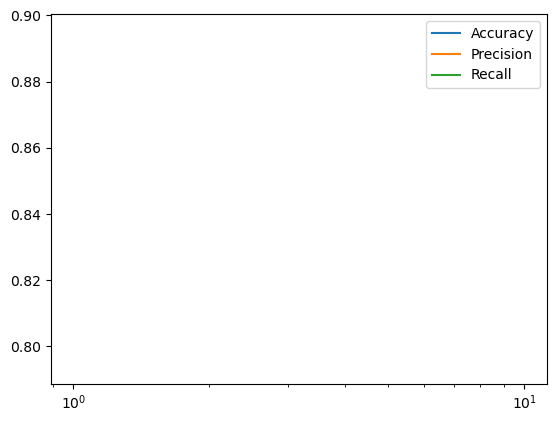

In [89]:
fig, ax = plt.subplots()

ax.plot(C, acc, label = 'Accuracy')
ax.plot(C, pre, label = 'Precision')
ax.plot(C, rec, label = 'Recall')

ax.set_xscale('log')

ax.legend()